In [1]:
import matplotlib as mpl
mpl.rcParams['savefig.pad_inches'] = 0
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D

%matplotlib notebook

Set MJD-OBS to 52677.821227 from DATE-OBS.
Set MJD-END to 52678.075891 from DATE-END'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


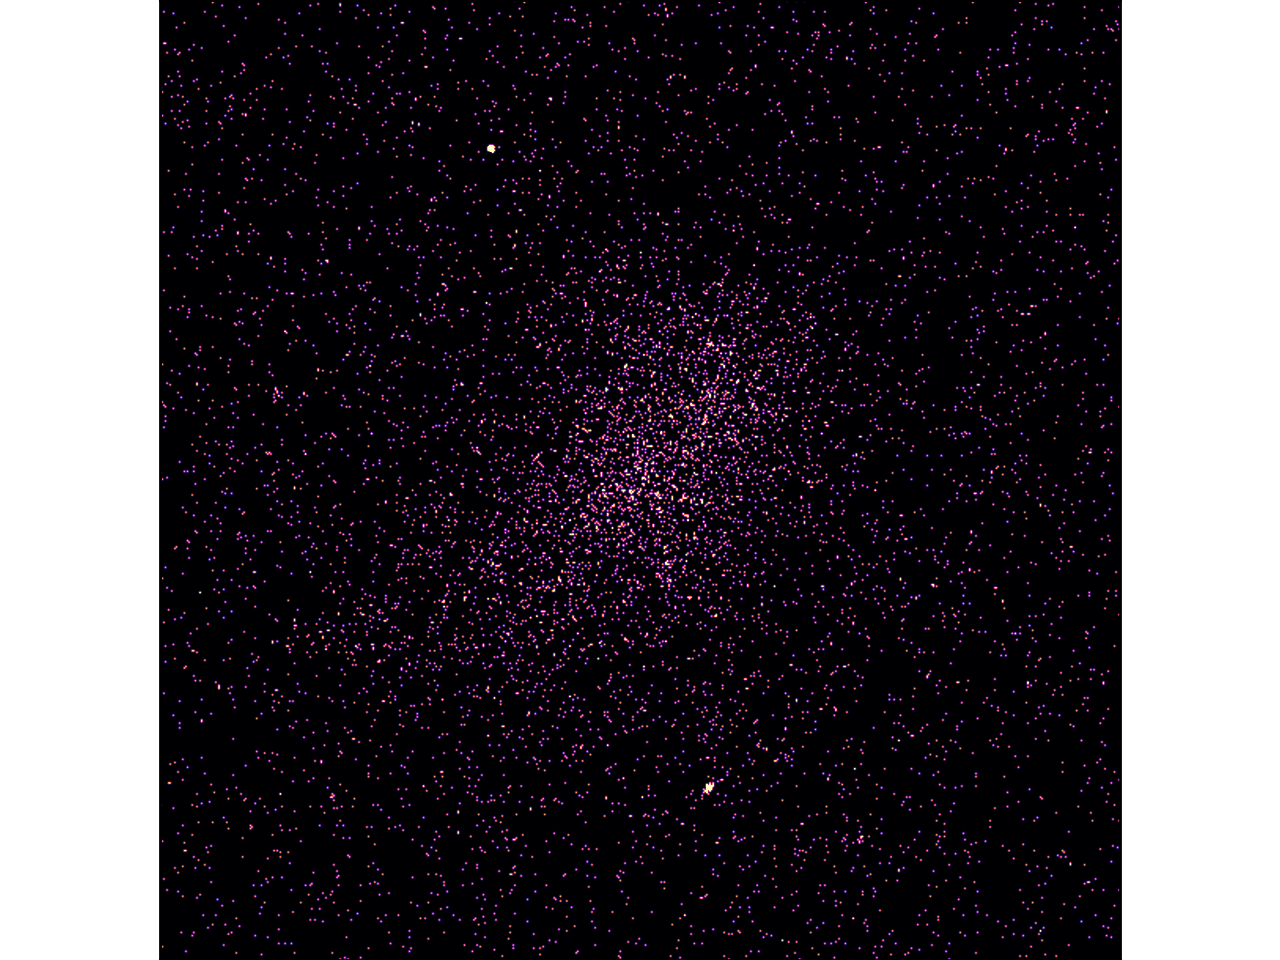

In [2]:
hdulist = fits.open("acisf03589N004_cntr_img2.fits.gz")
sc = SkyCoord(177.3976 * u.deg, 22.4011 * u.deg)
ct = Cutout2D(hdulist[0].data, sc, 5 * u.arcmin, wcs=WCS(hdulist[0].header))
fig = plt.figure()
ax = fig.add_subplot(111) #, projection=ct.wcs)
im = ax.imshow(np.sqrt(ct.data), vmin=0.0, vmax=0.75, cmap="magma", interpolation="gaussian", origin="lower")
ax.set_xticks([])
ax.set_yticks([])
#fig.colorbar(im)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=1)
fig.savefig("macsj1149_X.pdf", bbox_inches="tight")

Set MJD-OBS to 52677.821227 from DATE-OBS.
Set MJD-END to 52678.075891 from DATE-END'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


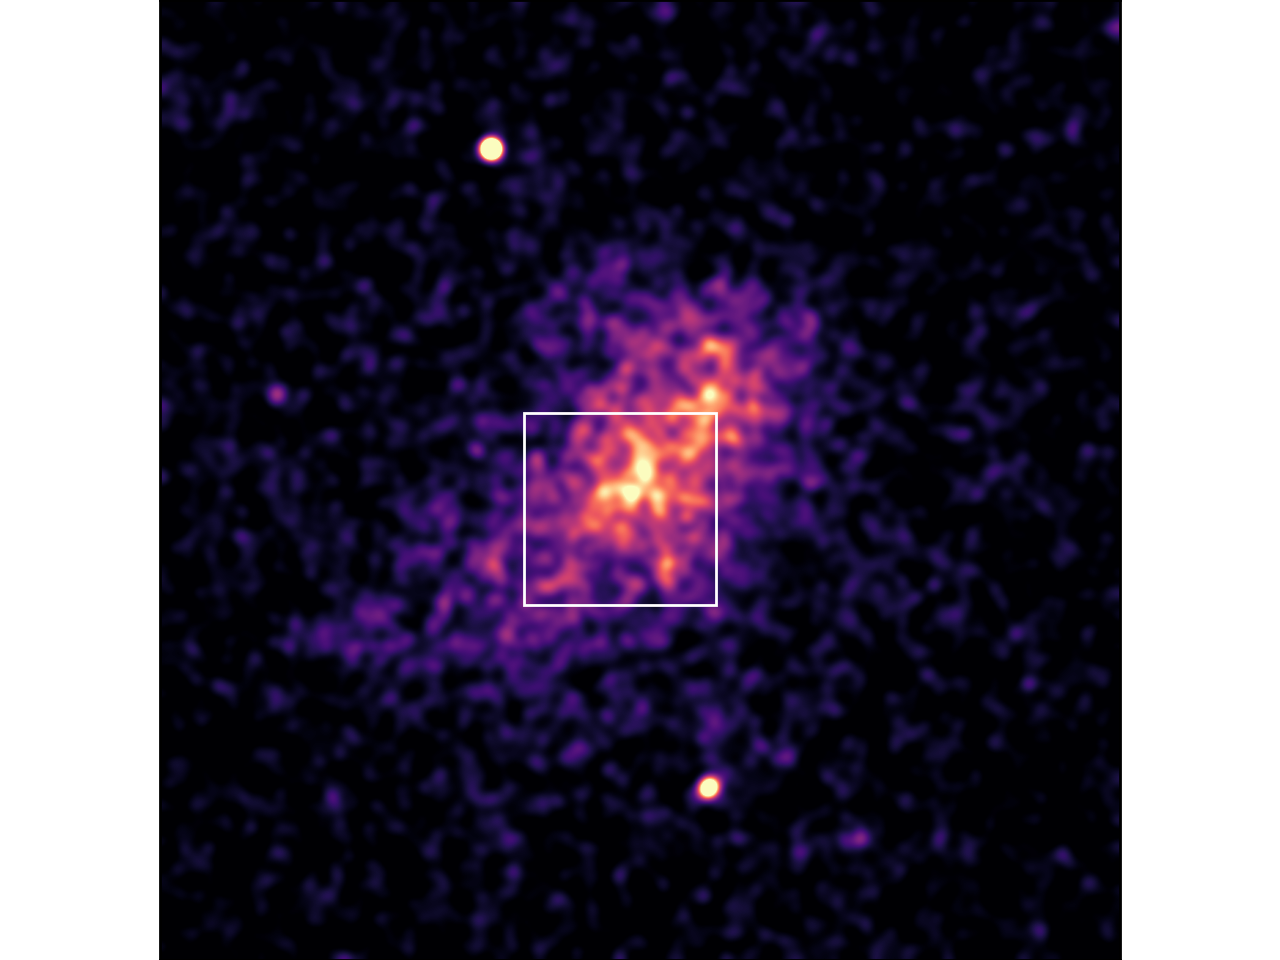

In [3]:
from scipy.ndimage import gaussian_filter

ct = Cutout2D(np.array(hdulist[0].data, dtype=float), sc, 5 * u.arcmin, wcs=WCS(hdulist[0].header))
ct.data = gaussian_filter(ct.data, 4.0)
fig = plt.figure()
ax = fig.add_subplot(111) #, projection=ct.wcs)
im = ax.imshow(ct.data, vmin=0.01, vmax=0.2, cmap="magma", interpolation="gaussian", origin="lower")
ax.set_xticks([])
ax.set_yticks([])
#fig.colorbar(im)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=1)
fig.savefig("macsj1149_X_smooth.pdf", bbox_inches="tight")

In [4]:
coords_frame = SkyCoord("11h49m35.86s +22d23m55.0s", frame="fk5")
ct_frame = Cutout2D(ct.data, coords_frame, 1.0 * u.arcmin, wcs=ct.wcs)
bbox = np.array(ct_frame.bbox_original)
print(bbox)
ct_frame.plot_on_original(color="w")
fig.savefig("macsj1149_X_frame.pdf", bbox_inches="tight")

[[226 347]
 [232 353]]
